# Titanic Dataset – EDA & Data Cleaning

This notebook performs exploratory data analysis and basic cleaning on the Titanic dataset. It prepares the dataset for future machine learning modeling.

## 1. Import Libraries

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

sns.set(style='whitegrid')

## 2. Load Data

In [55]:
df = pd.read_csv('./data/titanic.csv')  
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Exploratory Data Analysis (EDA)

In [58]:
# Overview of data
print(df.shape)
df.info()
df.describe(include='all')

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [60]:
# Missing values
missing = df.isnull().sum()
missing[missing > 0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [62]:
# Categorical variables distribution
categorical = df.select_dtypes(include='object')
for col in categorical.columns:
    print(df[col].value_counts())
    print('-'*40)

Name
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: count, Length: 891, dtype: int64
----------------------------------------
Sex
male      577
female    314
Name: count, dtype: int64
----------------------------------------
Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64
----------------------------------------
Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26     

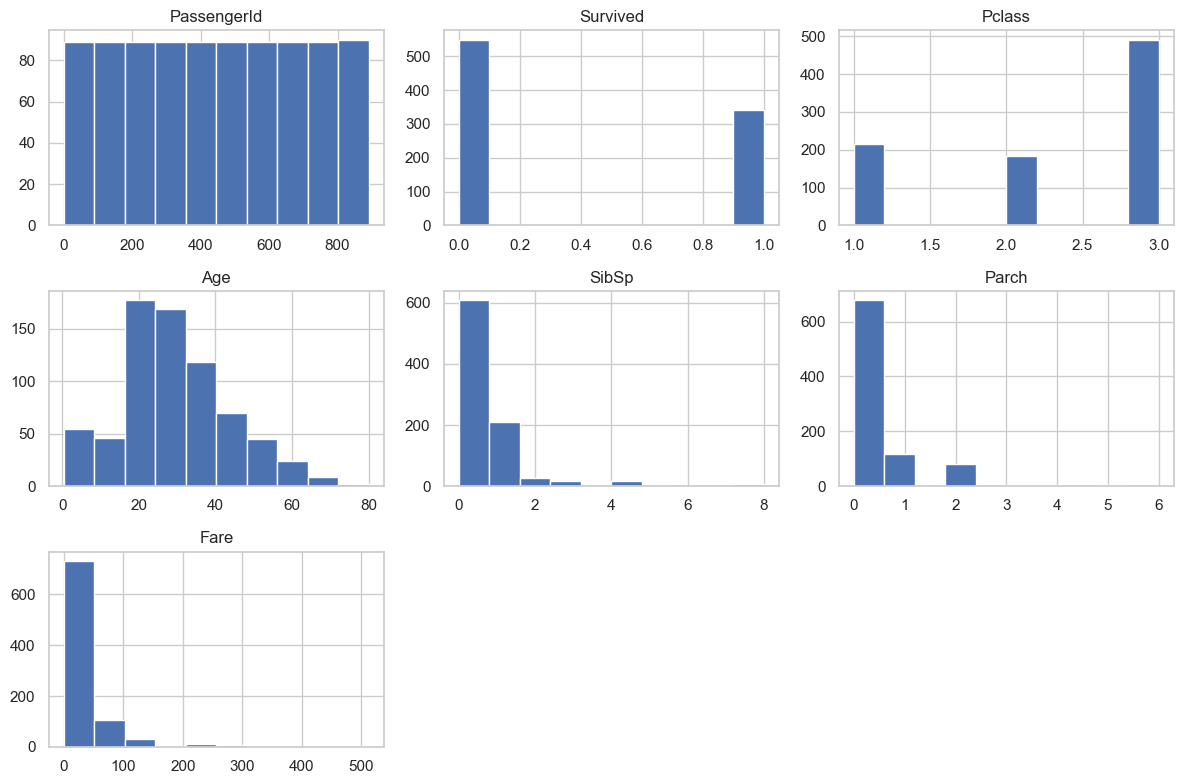

In [64]:
# Numerical variable distribution
numerical = df.select_dtypes(include=['int64', 'float64'])
numerical.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

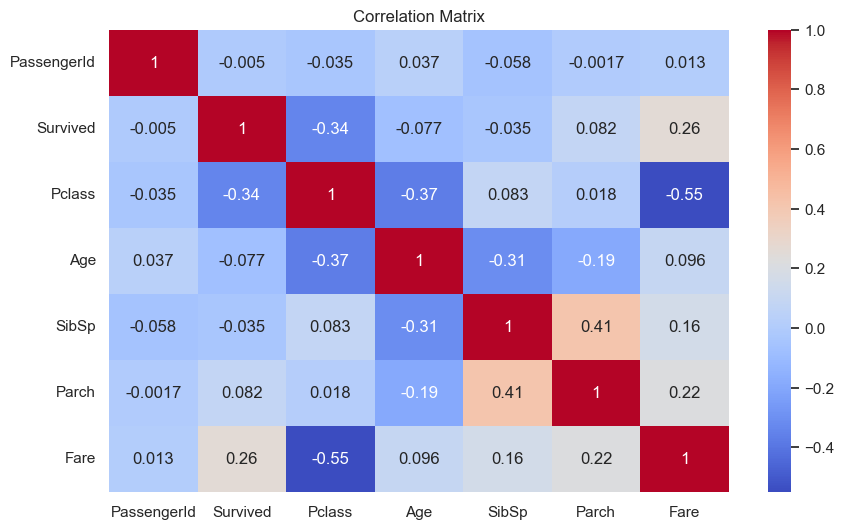

In [66]:
# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numerical.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## 4. Data Cleaning

In [69]:
# Fill missing 'age' with median

if df['Age'].notna().sum() > 0:
    df['Age'] = df['Age'].fillna(df['Age'].median())
else:
    print("Warning: 'Age' column is empty or only contains NaNs.")


In [73]:
# Drop rows with missing 'embarked'
df.dropna(subset=['Embarked'], inplace=True)

In [75]:
# Drop 'deck' due to too many missing values
if 'deck' in df.columns:
    df.drop(columns=['deck'], inplace=True)

In [79]:
# Encode 'sex' and 'embarked'
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

## 5. Preprocessing

In [82]:
# Drop irrelevant columns (like name, ticket, cabin)
df.drop(columns=['embark_town', 'alive', 'class', 'who', 'adult_male', 'alone'], inplace=True, errors='ignore')

In [115]:
df.to_csv('titanic_cleaned.csv', index=False)

In [86]:
# Train-test split
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 6. Conclusion

The Titanic dataset has been cleaned and preprocessed. It is now ready for machine learning modeling, such as logistic regression or decision trees.